In [1]:
print("hello world")

hello world


In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

# Importing the necessary Dependencies

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [7]:
dataset = datasets.fashion_mnist
((Train_images, Train_labels), (Test_images, Test_labels)) = dataset.load_data()

In [8]:
print(Train_images.shape, Test_images.shape, Train_labels.shape, Test_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [9]:
print(type(dataset))

<class 'module'>


In [10]:
print(Train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

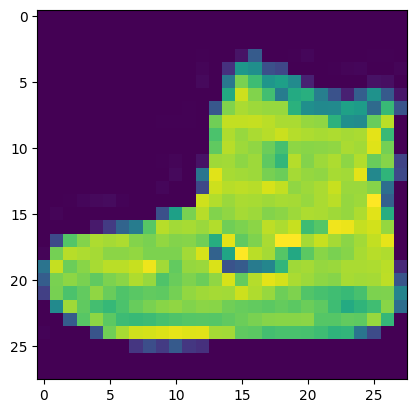

In [11]:
plt.imshow(Train_images[0])
plt.show()

# Class names = [T-Shirt/Top, Trouser, PullOver, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot]

In [30]:
Train_images, Test_images = Train_images/255.0, Test_images/255.0

In [31]:
print(Train_images.shape)

(60000, 28, 28, 1)


In [32]:
# Reshape it so that the model can Understand that the input will be a grayscale

Train_images = Train_images.reshape((Train_images.shape[0], 28, 28, 1))
Test_images = Test_images.reshape((Test_images.shape[0], 28, 28, 1))

# Convolutional Neural Network

In [33]:
model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(Train_images, Train_labels, epochs=5,
                    validation_data=(Test_images, Test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026


In [38]:
test_loss, test_acc = model.evaluate(Test_images, Test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1062 - loss: 2.3025


In [39]:
print(test_acc)

0.10000000149011612


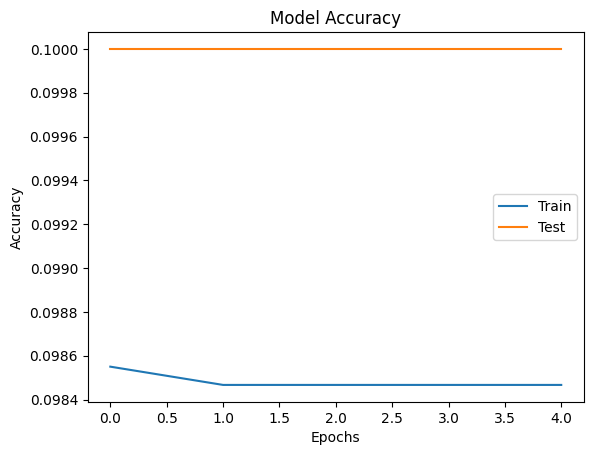

In [45]:
#Plot the values of Training accuracy and Validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train', 'Test'], loc="center right")
plt.show()

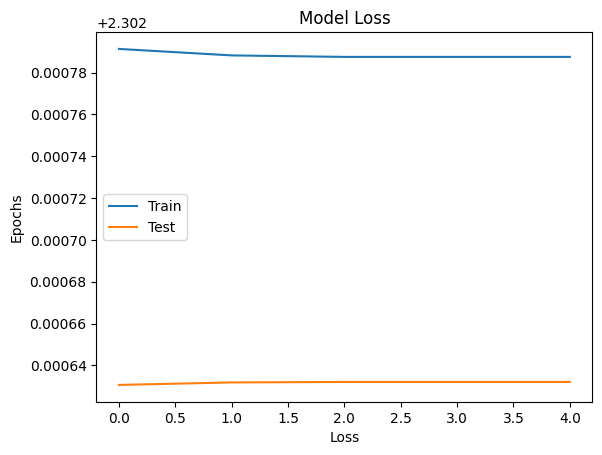

In [46]:
#Plotting the values of Training Loss and Testing Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['Train', 'Test'], loc="center left")
plt.show()

In [49]:
from google.colab import drive
drive.mount("/content/parimal")

Mounted at /content/parimal


In [52]:
import os
os.mkdir("/content/parimal/MyDrive/Models/FashionMNIST")

In [54]:
model.save("/content/parimal/MyDrive/Models/FashionMNIST/fashionMNIST.h5")